### Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Открываем первую страницу файла эксель

In [2]:
data1 = pd.read_excel('C:/Users/arl9k/my_python_projects/test/тестовое_мл_аналитик.xlsx',sheet_name=0)
data1.head()

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
0,994485,30968665,22955,1,38.0,52
1,994485,30968665,24860,1,36.0,52
2,1323249,30968664,20981,1,449.0,155
3,412480,30968663,10001,1,779.0,117
4,412480,30968663,10002,1,685.0,117


#### Определим форму таблицы

In [3]:
data1.shape

(1000, 6)

Как видим, таблица состоит из 1000 строк и 6 столбцов

### Посмотрим статистический отчёт

In [4]:
data1.describe(include='all')

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
count,1.000000e+03,1.000000e+03,991.0,1000.000000,992.000000,1000.000000
unique,NaN,NaN,606.0,NaN,NaN,NaN
top,NaN,NaN,600814.0,NaN,NaN,NaN
freq,NaN,NaN,73.0,NaN,NaN,NaN
mean,1.271079e+06,3.096632e+07,NaN,1.801000,269.677419,107.019000
std,4.707765e+05,1.750682e+03,NaN,3.208067,433.011778,75.562639
min,9.252000e+04,3.096388e+07,NaN,1.000000,3.000000,1.000000
25%,9.163310e+05,3.096452e+07,NaN,1.000000,63.000000,42.000000
50%,1.555323e+06,3.096736e+07,NaN,1.000000,93.000000,103.000000
75%,1.637580e+06,3.096794e+07,NaN,2.000000,284.000000,155.000000


Обратим внимание на то, что в стобцах "product_article" и "invoice_product_price" количество строк меньше 1000, что говорит об отсутсвующих данных в этих столбцах. Также столбец "product_article" не определяется как числовой, возможно имеются проблемы с типом данных

### Рассмотрим еще отчёты о датафрейме

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_retail_id            1000 non-null   int64  
 1   invoice_id                  1000 non-null   int64  
 2   product_article             991 non-null    object 
 3   invoice_product_all_amount  1000 non-null   int64  
 4   invoice_product_price       992 non-null    float64
 5   shop_id                     1000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


Действительно, в указанных столбцах отсутствуют данные и тип данных "product_article" - строковый, хотя предполагается целочисленный (int64).

In [6]:
data1.isna().sum()

client_retail_id              0
invoice_id                    0
product_article               9
invoice_product_all_amount    0
invoice_product_price         8
shop_id                       0
dtype: int64

В столбце "product_article" и "invoice_product_price" по 9 и 8 отсутствующих данных, соответственно

In [7]:
data1.dtypes

client_retail_id                int64
invoice_id                      int64
product_article                object
invoice_product_all_amount      int64
invoice_product_price         float64
shop_id                         int64
dtype: object

### Работа с отсутсвующими данными

Начнем работу со столбцом "product_article". Для начала осмотрим уникальные элементы столбца.

In [8]:
data1['product_article'].unique()

array([22955, 24860, 20981, 10001, 10002, 35577, 20783, 11152, 21953,
       24406, 25103, 24407, 25360, 24975, 21829, 600814, 24256, 20046,
       34271, 24497, 22498, 21507, 12816, 37762, 24409, 33898, 47670,
       31080, 24862, 22951, 24964, 34145, 20055, 22733, 20358, 20344,
       22524, 22201, 21157, 20246, 21615, 33661, 40060, 15127, 40944,
       20707, 25200, 20346, 26092, 20352, 24065, 18610, 33899, 47573,
       20585, 20366, 20521, 40777, 12729, 22624, 20734, 21074, 20541,
       15337, 36129, 20575, 25199, nan, 23366, 20255, 21217, 19207, 14341,
       26115, 17700, 12402, 50344, 17160, 12149, 20733, 10228, 10226,
       10174, 25104, 24709, 26494, 24596, 24593, 24595, 23417, 23285,
       22588, 19511, 33990, 17724, 48652, 40746, 25319, 22586, 24180,
       24509, 20356, 46599, 21298, 25364, 20785, 20782, 21142, 21106,
       24372, 24362, 11134, 48673, 11383, 14167, 20048, 22231, 21294,
       33983, 34828, 17500, 17728, 24401, 24400, 14158, 22625, 26118,
       22722, 

Можно заметить, что помимо отсутствующих данных, в массиве имеются также и поврежденные данные. Рассмотрим их детально.

In [9]:
data1[data1['product_article'].str.contains('.')==True]

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
239,661866,30968344,18554.10,1,236.0,54
373,603877,30967982,47378.Р»Р°Р№Рј,1,830.0,80
442,1439491,30964497,24656.С‡РµСЂРЅРёС‡,1,111.0,11
491,316502,30967857,19247.СЃРёРЅ,1,976.0,155
592,898568,30967949,10850.СЂРѕР·,1,970.0,88
635,1106433,30967932,20704.Р·РµР»,1,290.0,54
713,1707316,30964261,47510.Р»Р°Р№Рј,1,334.0,79
763,1731803,30967619,24263.РјР°Р»,1,397.0,55
771,1731807,30967616,48650.РіРѕР»,1,1004.0,28
880,1623222,30967771,24647.С‡РµСЂРЅРёС‡,1,1163.0,148


Создадим новый датафрейм, в котором обработаем некорректные данные и внедрим обратно качественные.

In [10]:
df = data1[data1['product_article'].str.contains('.')==True]
df

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
239,661866,30968344,18554.10,1,236.0,54
373,603877,30967982,47378.Р»Р°Р№Рј,1,830.0,80
442,1439491,30964497,24656.С‡РµСЂРЅРёС‡,1,111.0,11
491,316502,30967857,19247.СЃРёРЅ,1,976.0,155
592,898568,30967949,10850.СЂРѕР·,1,970.0,88
635,1106433,30967932,20704.Р·РµР»,1,290.0,54
713,1707316,30964261,47510.Р»Р°Р№Рј,1,334.0,79
763,1731803,30967619,24263.РјР°Р»,1,397.0,55
771,1731807,30967616,48650.РіРѕР»,1,1004.0,28
880,1623222,30967771,24647.С‡РµСЂРЅРёС‡,1,1163.0,148


У ошибок имеется определенный паттерн, очевидно, после артикула идёт посторонний текст. Поделим датафрейм на 2 столбца и отделим артикул от "мусора".

In [11]:
df = df.product_article.str.split('.',expand=True)
df.columns = ['number', 'broke']
df

,number,broke
239,18554,10
373,47378,Р»Р°Р№Рј
442,24656,С‡РµСЂРЅРёС‡
491,19247,СЃРёРЅ
592,10850,СЂРѕР·
635,20704,Р·РµР»
713,47510,Р»Р°Р№Рј
763,24263,РјР°Р»
771,48650,РіРѕР»
880,24647,С‡РµСЂРЅРёС‡


Удалим столбец с "мусором" и внедрим очищенные данные в первоначальную таблицу.

In [12]:
df = df.drop(['broke'], axis='columns')
df

,number
239,18554
373,47378
442,24656
491,19247
592,10850
635,20704
713,47510
763,24263
771,48650
880,24647


Выведем индексы данных для внедрения

In [13]:
ind = df.index
ind

Int64Index([239, 373, 442, 491, 592, 635, 713, 763, 771, 880, 915, 947], dtype='int64')

Добавим их в отдельный лист

In [14]:
a =[i for i in ind]
a

[239, 373, 442, 491, 592, 635, 713, 763, 771, 880, 915, 947]

Теперь произведем замену испорченных данных под этими индексами на очищенные.

In [15]:
data1.iloc[a,2] = df.iloc[:,0]
data1.iloc[a,2]

239    18554
373    47378
442    24656
491    19247
592    10850
635    20704
713    47510
763    24263
771    48650
880    24647
915    10845
947    24659
Name: product_article, dtype: object

Чтобы начать работу с типом данных в столбце, для начала обработаем отсутсвующие данные.
Это можно сделать несколькими способами, например удалить или заменить.

### Обработка отсутствующих данных.

Рассмотрим отсутствующие данные в нашем датафрейме.

In [16]:
data1[(data1[['product_article','invoice_product_price']]).isnull().values]

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
75,975628,30964838,NaN,1,135.0,31
169,870725,30964967,20255,2,NaN,32
180,1731855,30968428,NaN,1,3.0,103
237,1534281,30968346,14642,1,NaN,25
291,476172,30964625,35901,5,NaN,8
311,1248851,30968010,NaN,5,32.0,245
316,723731,30968007,24328,1,NaN,245
431,1594100,30964647,NaN,5,20.0,14
434,1588657,30967911,26495,1,NaN,29
542,451899,30964410,NaN,1,361.0,223


Как можно заметить, заменить артикул товара средним по столбцу или иным заметилем не имеет большого смысла. Поэтому строки с отсутсвующими данными по столбцу "product_article" придется удалить. А вот тсутсвующие данные в столбце "invoice_product_price", в свою очередь можно заменить, на среднее значение с учётом количества товаров в чеке.
Начнем работу со столбцом артикула.

### Удаляем отсутсвующие данные 

In [17]:
data1.dropna(subset=['product_article'],inplace=True)

Проверяем, действительно ли все удалилось

In [18]:
data1['product_article'].isna().sum()

0

Действительно, строки с отсутсвующими данными в столбце артикула удалены. Приступаем к работе с типом данных.

### Восстанавливаем тип данных столбца артикулов

In [19]:
data1.dtypes

client_retail_id                int64
invoice_id                      int64
product_article                object
invoice_product_all_amount      int64
invoice_product_price         float64
shop_id                         int64
dtype: object

In [20]:
data1['product_article'] = data1['product_article'].astype("int64")

In [21]:
data1.dtypes

client_retail_id                int64
invoice_id                      int64
product_article                 int64
invoice_product_all_amount      int64
invoice_product_price         float64
shop_id                         int64
dtype: object

Этой манипуляцией мы проверили, что больше нет ограничений в возможности манипуляции данными. При этом у нас нет предпосылок оставлять столбцы product_article и shop_id, а также client_retail_id, int64, invoice_id как целочисленные, ведь они являются качественными показателями. Поэтому сменим обратно на строковый формат.

In [22]:
data1[['client_retail_id', 'invoice_id', 'product_article','shop_id']] = data1[['client_retail_id', 'invoice_id', 'product_article','shop_id']].astype("object")

In [23]:
data1.dtypes

client_retail_id               object
invoice_id                     object
product_article                object
invoice_product_all_amount      int64
invoice_product_price         float64
shop_id                        object
dtype: object

### Обработаем отсутствующие данные столбца invoice_product_price

In [24]:
data1.isna().sum()

client_retail_id              0
invoice_id                    0
product_article               0
invoice_product_all_amount    0
invoice_product_price         8
shop_id                       0
dtype: int64

Таковых имеется 8 штук. Создадим дополнительный датафрейм и будем работать в нём.

In [25]:
df1 = data1[(data1['invoice_product_price']).isnull().values]
df1

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
169,870725,30964967,20255,2,NaN,32
237,1534281,30968346,14642,1,NaN,25
291,476172,30964625,35901,5,NaN,8
316,723731,30968007,24328,1,NaN,245
434,1588657,30967911,26495,1,NaN,29
678,1657009,30964288,21217,1,NaN,28
738,1670144,30967640,33985,1,NaN,87
910,1572428,30967724,24359,1,NaN,184


Сохраним индексы для дальнейшего внедрения новых данных

In [26]:
ind1 = [i for i in df1.index]
ind1

[169, 237, 291, 316, 434, 678, 738, 910]

Сохраним артикулы товаров, чтобы узнать среднюю цену по артикулу

In [27]:
art_df = df1.loc[:,'product_article'].to_frame()
art_df
d = [i for i in art_df['product_article']]
d

[20255, 14642, 35901, 24328, 26495, 21217, 33985, 24359]

Создадим новый датафрейм для того чтобы узнать среднюю цену по артикулу

In [28]:
art_df1 = pd.DataFrame()
for i in d:
    art_df1 = art_df1.append(data1[data1['product_article'] == i])

In [29]:
art_df1 = art_df1.groupby('product_article').mean()

In [30]:
notnull = art_df1[art_df1['invoice_product_price'].notnull()]
notnull

,invoice_product_all_amount,invoice_product_price
product_article,,
20255,1.500000,117.0
21217,1.000000,837.5
24359,1.666667,77.5
26495,1.000000,77.0


Как мы видим, не все артикулы раньше покупались, поэтому вместо значений цены таких артикулов вставим среднюю цену всех товаров.

In [31]:
null = art_df1[art_df1['invoice_product_price'].isnull()]
null

,invoice_product_all_amount,invoice_product_price
product_article,,
14642,1.0,NaN
24328,1.0,NaN
33985,1.0,NaN
35901,5.0,NaN


In [32]:
notnull_list = [i for i in notnull.index]
null_list = [i for i in null.index]

In [33]:
notnull

,invoice_product_all_amount,invoice_product_price
product_article,,
20255,1.500000,117.0
21217,1.000000,837.5
24359,1.666667,77.5
26495,1.000000,77.0


In [34]:
pd.options.mode.chained_assignment = None

In [35]:
df1.loc[169,'invoice_product_price'] = notnull.loc[20255, 'invoice_product_price']
df1.loc[678,'invoice_product_price'] = notnull.loc[21217,'invoice_product_price']
df1.loc[910,'invoice_product_price'] = notnull.loc[24359,'invoice_product_price']
df1.loc[434,'invoice_product_price'] = notnull.loc[26495,'invoice_product_price']

In [36]:
df1

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
169,870725,30964967,20255,2,117.0,32
237,1534281,30968346,14642,1,NaN,25
291,476172,30964625,35901,5,NaN,8
316,723731,30968007,24328,1,NaN,245
434,1588657,30967911,26495,1,77.0,29
678,1657009,30964288,21217,1,837.5,28
738,1670144,30967640,33985,1,NaN,87
910,1572428,30967724,24359,1,77.5,184


Оставшиеся пустые данные заполним средним значением цены. Определим среднюю цену продуктов в чеке.

In [37]:
avg_price = round(data1['invoice_product_price'].astype("float").mean(axis=0),2)
print("средняя цена:", avg_price)

средняя цена: 271.24


Внедрим в новый датафрейм

In [38]:
df1["invoice_product_price"].replace(np.nan, avg_price, inplace=True)
df1

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
169,870725,30964967,20255,2,117.00,32
237,1534281,30968346,14642,1,271.24,25
291,476172,30964625,35901,5,271.24,8
316,723731,30968007,24328,1,271.24,245
434,1588657,30967911,26495,1,77.00,29
678,1657009,30964288,21217,1,837.50,28
738,1670144,30967640,33985,1,271.24,87
910,1572428,30967724,24359,1,77.50,184


In [39]:
data1.loc[ind1] = df1.iloc[:]

In [40]:
data1.loc[ind1]

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
169,870725,30964967,20255,2,117.00,32
237,1534281,30968346,14642,1,271.24,25
291,476172,30964625,35901,5,271.24,8
316,723731,30968007,24328,1,271.24,245
434,1588657,30967911,26495,1,77.00,29
678,1657009,30964288,21217,1,837.50,28
738,1670144,30967640,33985,1,271.24,87
910,1572428,30967724,24359,1,77.50,184


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_retail_id            991 non-null    object 
 1   invoice_id                  991 non-null    object 
 2   product_article             991 non-null    object 
 3   invoice_product_all_amount  991 non-null    int64  
 4   invoice_product_price       991 non-null    float64
 5   shop_id                     991 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 94.2+ KB


Нам необходимо сбросить индексы, ведь мы удалили часть строк из датасета

In [42]:
data1.reset_index()

,index,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
0,0,994485,30968665,22955,1,38.0,52
1,1,994485,30968665,24860,1,36.0,52
2,2,1323249,30968664,20981,1,449.0,155
3,3,412480,30968663,10001,1,779.0,117
4,4,412480,30968663,10002,1,685.0,117
...,...,...,...,...,...,...,...
986,995,1283366,30967327,11334,1,289.0,52
987,996,1576999,30963886,20224,60,43.0,149
988,997,1576999,30963886,600814,2,3.0,149
989,998,1658756,30967325,25057,1,398.0,14


Как мы видим, в наших данных больше нет отсутствующих данных и типы всех столбцов соответствуют норме. Перейдем непосредственно к анализу. Предварительно сохранив  полученный датафрейм обратно в формат xlsx.

In [43]:
data1.to_excel('очищенные данные.xlsx')

## Количественный анализ и визуализация

Создадим копию датафрейма для работы над визуалиацией.

In [44]:
graf_df = data1

In [45]:
graf_df.describe(include='all')

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id
count,991.0,991.0,991.0,991.000000,991.000000,991.0
unique,425.0,433.0,606.0,NaN,NaN,94.0
top,451899.0,30964410.0,600814.0,NaN,NaN,28.0
freq,16.0,16.0,73.0,NaN,NaN,40.0
mean,NaN,NaN,NaN,1.798184,271.265348,NaN
std,NaN,NaN,NaN,3.218576,433.301889,NaN
min,NaN,NaN,NaN,1.000000,3.000000,NaN
25%,NaN,NaN,NaN,1.000000,63.500000,NaN
50%,NaN,NaN,NaN,1.000000,94.000000,NaN
75%,NaN,NaN,NaN,2.000000,284.000000,NaN


Стоит обратить внимание на количество уникальных клиентов и общее количество Id клиетов. Разница почти в два раза, это может говорить о высокой конверсии во вторую и последующие покупки.

Добавим в наш датасет столбец с объемом продаж конкретного товара за сделку.

In [46]:
graf_df['volume'] = graf_df['invoice_product_price'] * graf_df['invoice_product_all_amount']
graf_df['volume'] = graf_df['volume'].astype('int')

In [47]:
graf_df.sort_values(by = ['volume'], ascending=False).head(10)

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id,volume
130,1129652,30964785,11134,1,4268.0,7,4268
138,693373,30964782,34828,1,3858.0,14,3858
134,1170853,30968194,20048,1,3197.0,50,3197
394,1605321,30964554,34864,1,3141.0,116,3141
999,1576999,30963885,20224,60,46.0,149,2760
142,994420,30968192,24401,1,2661.0,245,2661
611,1700739,30964530,20465,1,2661.0,220,2661
143,994420,30968192,24400,1,2661.0,245,2661
996,1576999,30963886,20224,60,43.0,149,2580
461,776576,30964487,12958,1,2303.0,50,2303


На основе столбца volume мы сможем рассмотреть сгруппированные по товарам и магазинам данные.

С точки зрения аналитики в данном датасете нас в наибольшей степени будет интересовать качественные столбцы product_article и shop_id. А также количественные invoice_product_all_amount, invoice_product_price. Рассматривая их, мы можем ответить на вопросы:

1. Какой товар самый продаваемый в целом по сети? 
2. У какого магазина самые большие продажи?
3. Партнерство с каким клиентом самое выгодное?

Начнем с рассмотрения товаров.

In [48]:
graf_df.invoice_product_price.describe()    

count     991.000000
mean      271.265348
std       433.301889
min         3.000000
25%        63.500000
50%        94.000000
75%       284.000000
max      4268.000000
Name: invoice_product_price, dtype: float64

In [49]:
graf_df[graf_df['volume'] == graf_df['invoice_product_price'].max()]

,client_retail_id,invoice_id,product_article,invoice_product_all_amount,invoice_product_price,shop_id,volume
130,1129652,30964785,11134,1,4268.0,7,4268


Товар с максимальной ценой в 4268 у.е. в базе - товар №11134. Еще один показатель - средний чек компании, мы уже посчитали ранее. Он равняется 
271.27 у.е.

Рассмотрим самые продаваемые продукты.

In [50]:
prod = graf_df.groupby('product_article',as_index=False).sum()
prod['product_article'] = prod['product_article'].astype("object")
prod.describe(include='all')

,product_article,invoice_product_all_amount,invoice_product_price,volume
count,606.0,606.000000,606.000000,606.000000
unique,606.0,NaN,NaN,NaN
top,24575.0,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN
mean,NaN,2.940594,443.603894,529.366337
std,NaN,6.833300,610.035736,654.929691
min,NaN,1.000000,20.000000,20.000000
25%,NaN,1.000000,95.750000,145.000000
50%,NaN,1.000000,228.500000,288.500000
75%,NaN,2.000000,481.750000,678.750000


Из 606 имеющихся артикулов товаров, 75% всей выборки не превышают индивидуальную выручку в 678,75 у.е., а средняя индивидуальная выручка составляет 529,36 у.е.

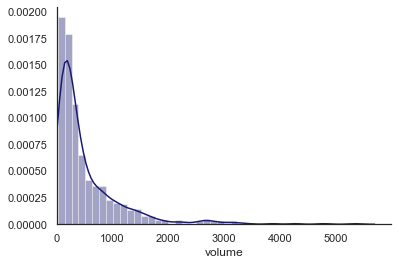

In [51]:
sns.set_style('white')
sns.distplot(prod.volume, color='midnightblue')
plt.xlim(0)
sns.despine()

In [52]:
top_prod = graf_df.groupby('product_article',as_index=False).sum()
top_prod = top_prod.sort_values(by=['volume'], ascending=False).head(10)
top_prod.iloc[:,[0,1,3]]

,product_article,invoice_product_all_amount,volume
124,20224,120,5340
198,21107,4,4777
15,11134,1,4268
511,34828,1,3858
161,20585,3,3408
114,20048,1,3197
515,34864,1,3141
222,21306,3,3111
208,21157,2,2926
25,11805,13,2886


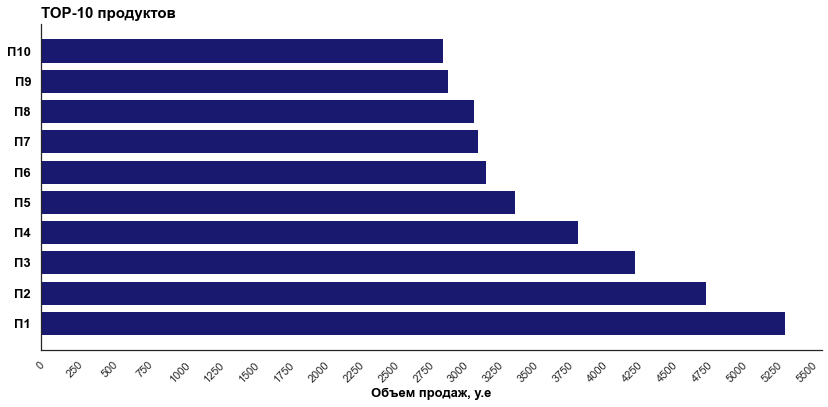

In [53]:
sns.set_style('white')
labels = ['П1', 'П2', 'П3', 'П4', 'П5', 'П6', 'П7', 'П8', 'П9','П10']
top_prod_val = [i for i in top_prod.loc[:,'volume']]
plt.figure(figsize = (14,6))
plt.barh(labels,
         width=top_prod_val,
         color='midnightblue')
plt.title('TOP-10 продуктов', fontsize = 15, fontweight = 'bold', color = 'black', loc = 'left')
plt.xlabel('Объем продаж, у.е', fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13,fontweight = 'bold', color = 'black')
plt.xticks(np.arange(0, 5600, step=250), rotation=45)
sns.despine()
plt.show()

Где 'П1', 'П2',...,'П10' соответствуют продукту по убыванию выручки. (К сожалению, названий я не знаю)

C:\Users\arl9k\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


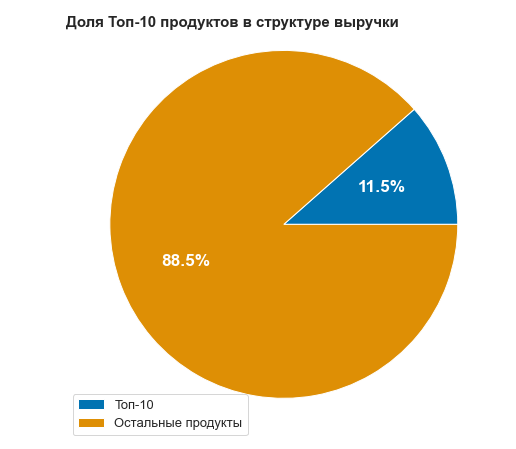

In [54]:
sns.set_style('white')
sns.set_palette('colorblind')

pie_prod_df = pd.DataFrame({
    'Top10': top_prod.volume.sum(),
    'Остальные': (graf_df.volume.sum()-top_prod.volume.sum())
    }, columns = ('Top10', 'Остальные'),
    index=[0])

plt.figure(figsize=(10,8))
plt.pie(pie_prod_df,
        labels = ['top10', 'Остальные'],
        autopct = '%.1f%%',
        textprops = {'size': 'x-large',
                    'fontweight': 'bold',
                    'color': 'w'})
plt.title('Доля Топ-10 продуктов в структуре выручки',
          fontsize=15,
          fontweight = 'bold',
          loc = 'left',
          pad=-20)

plt.legend(['Топ-10', 'Остальные продукты'],
           fontsize=13,
           loc='lower left')
sns.despine()
plt.show()

Как мы видим доля этих десяти товаров в общей выручке колоссальна. Доля этих товаров составляет 11,5% от общей выручки сети.

Проведем аналогичные манипуляции по магазинам.

In [55]:
shop = graf_df.groupby('shop_id',as_index=False).sum()
shop['shop_id'] = shop['shop_id'].astype("object")
shop.describe(include='all')

,shop_id,invoice_product_all_amount,invoice_product_price,volume
count,94.0,94.000000,94.000000,94.000000
unique,94.0,NaN,NaN,NaN
top,127.0,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN
mean,NaN,18.957447,2859.829362,3412.723404
std,NaN,19.483058,2752.862285,3027.468677
min,NaN,1.000000,146.000000,154.000000
25%,NaN,6.000000,1024.250000,1397.000000
50%,NaN,12.500000,1884.000000,2473.000000
75%,NaN,24.000000,4051.250000,4793.750000


Средняя выручка 94 магазинов составляет 3412,72 у.е. При этом, 75% из выборки имеет индивидуальную выручку меньше 4793,75 у.е.

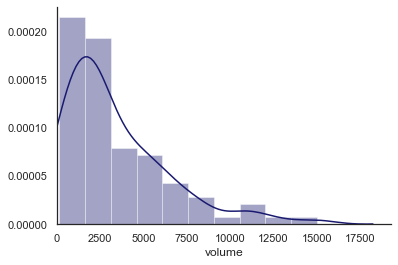

In [56]:
sns.set_style('white')
sns.distplot(shop.volume, color='midnightblue')
plt.xlim(0)
sns.despine()

Рассмотрим результаты лучших магазинов сети.

In [57]:
top_shop = graf_df.groupby('shop_id',as_index=False).sum()
top_shop = top_shop.sort_values(by=['volume'], ascending=False).head(10)
top_shop.iloc[:,[0,1,3]]

,shop_id,invoice_product_all_amount,volume
90,245,35,14999
27,50,38,12707
16,28,83,11229
41,80,41,10972
91,250,50,10690
51,107,64,9088
58,127,14,8001
70,155,27,7954
52,108,20,7950
54,116,44,7927


Самый успешный магазин компании - магазин под номером 245. Его выручка превышает среднюю выручку по сети почти в 4,5 раза.

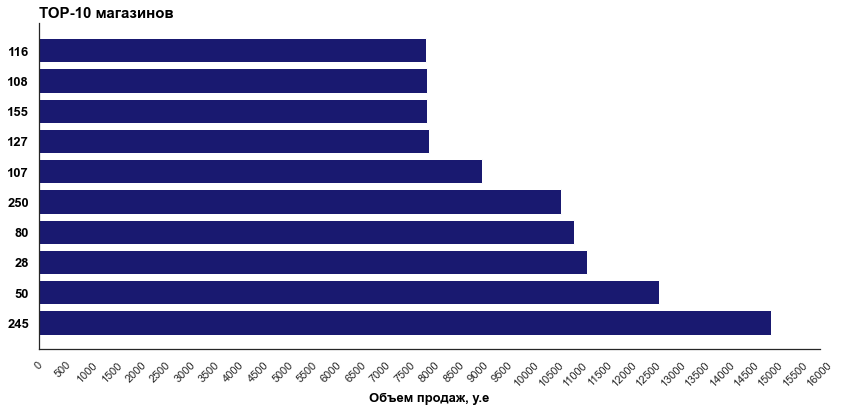

In [58]:
sns.set_style('white')
labels = ['245', '50', '28', '80', '250', '107', '127', '155', '108','116']
top_shop_val = [i for i in top_shop.loc[:,'volume']]
plt.figure(figsize = (14,6))
plt.barh(labels,
         width=top_shop_val,
         color='midnightblue')
plt.title('TOP-10 магазинов', fontsize = 15, fontweight = 'bold', color = 'black', loc = 'left')
plt.xlabel('Объем продаж, у.е', fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13,fontweight = 'bold', color = 'black')
plt.xticks(np.arange(0, 16500, step=500), rotation=45)
sns.despine()
plt.show()

C:\Users\arl9k\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


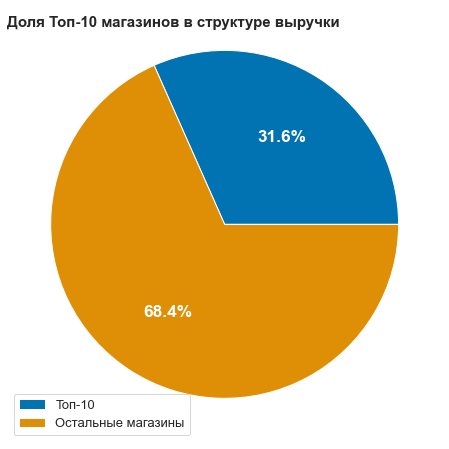

In [59]:
sns.set_style('white')
sns.set_palette('colorblind')

pie_shop_df = pd.DataFrame({
    'Top10': top_shop.volume.sum(),
    'Остальные': (graf_df.volume.sum()-top_shop.volume.sum())
    }, columns = ('Top10', 'Остальные'),
    index=[0])

plt.figure(figsize=(10,8))
plt.pie(pie_shop_df,
        labels = ['top10', 'Остальные'],
        autopct = '%.1f%%',
        textprops = {'size': 'x-large',
                    'fontweight': 'bold',
                    'color': 'w'})
plt.title('Доля Топ-10 магазинов в структуре выручки',
          fontsize=15,
          fontweight = 'bold',
          loc = 'left',
          pad=-20)

plt.legend(['Топ-10', 'Остальные магазины'],
           fontsize=13,
           loc='lower left')
sns.despine()
plt.show()

Топ-10 магазинов приносят почти треть выручки сети.

Аналогичную статистику можно применить и к клиентам.

In [60]:
client =  graf_df.groupby('client_retail_id',as_index=False).sum()
client['client_retail_id'] = client['client_retail_id'].astype("object")
client.describe(include='all')

,client_retail_id,invoice_product_all_amount,invoice_product_price,volume
count,425.0,425.000000,425.000000,425.000000
unique,425.0,NaN,NaN,NaN
top,1731654.0,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN
mean,NaN,4.192941,632.526965,754.814118
std,NaN,7.506943,693.865098,746.943009
min,NaN,1.000000,3.000000,3.000000
25%,NaN,1.000000,200.000000,278.000000
50%,NaN,2.000000,358.000000,518.000000
75%,NaN,5.000000,888.000000,1052.000000


В среднем, каждый из 425 клиентов приносит по 754,81 у.е. 

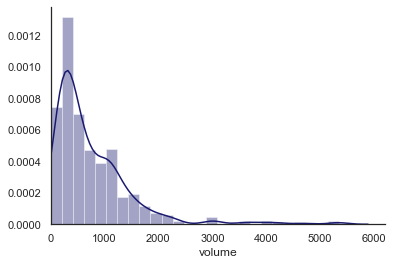

In [61]:
sns.set_style('white')
sns.distplot(client.volume, color='midnightblue')
plt.xlim(0)
sns.despine()

Рассмотрим самых прибыльных клиентов

In [62]:
top_client = graf_df.groupby('client_retail_id',as_index=False).sum()
top_client = top_client.sort_values(by=['volume'], ascending=False).head(10)
top_client.iloc[:,[0,1,3]]

,client_retail_id,invoice_product_all_amount,volume
222,1576999,122,5346
126,994420,2,5322
276,1605321,16,4712
146,1129652,1,4268
73,693373,2,4056
416,1731807,6,3917
296,1623222,7,3642
149,1170853,2,3586
191,1468880,6,3022
379,1700739,2,3015


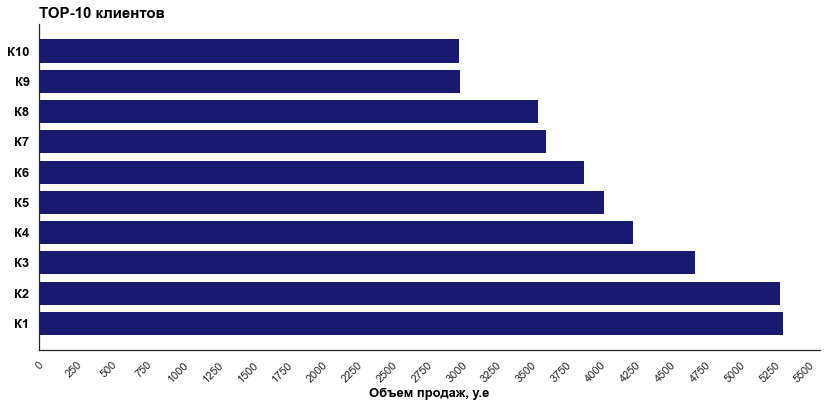

In [63]:
sns.set_style('white')
labels =  ['К1', 'К2', 'К3', 'К4', 'К5', 'К6', 'К7', 'К8', 'К9','К10']
top_client_val = [i for i in top_client.loc[:,'volume']]
plt.figure(figsize = (14,6))
plt.barh(labels,
         width=top_client_val,
         color='midnightblue')
plt.title('TOP-10 клиентов', fontsize = 15, fontweight = 'bold', color = 'black', loc = 'left')
plt.xlabel('Объем продаж, у.е', fontsize = 13, fontweight = 'bold', color = 'black')
plt.yticks(fontsize = 13,fontweight = 'bold', color = 'black')
plt.xticks(np.arange(0, 5600, step=250), rotation=45)
sns.despine()
plt.show()

C:\Users\arl9k\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


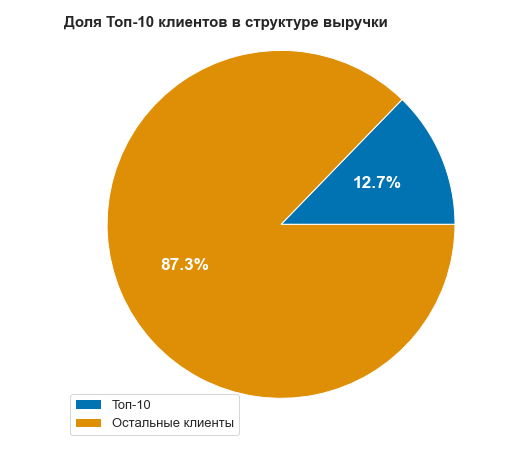

In [64]:
sns.set_style('white')
sns.set_palette('colorblind')

pie_client_df = pd.DataFrame({
    'Top10': top_client.volume.sum(),
    'Остальные': (graf_df.volume.sum()-top_client.volume.sum())
    }, columns = ('Top10', 'Остальные'),
    index=[0])

plt.figure(figsize=(10,8))
plt.pie(pie_client_df,
        labels = ['top10', 'Остальные'],
        autopct = '%.1f%%',
        textprops = {'size': 'x-large',
                    'fontweight': 'bold',
                    'color': 'w'})
plt.title('Доля Топ-10 клиентов в структуре выручки',
          fontsize=15,
          fontweight = 'bold',
          loc = 'left',
          pad=-20)

plt.legend(['Топ-10', 'Остальные клиенты'],
           fontsize=13,
           loc='lower left')
sns.despine()
plt.show()

Выручка от этих клиентов составляют 12,7% от всех клиентов.

# Второй датасет

Рассмотрим второй датасет

In [65]:
data2 = pd.read_excel('C:/Users/arl9k/my_python_projects/test/тестовое_мл_аналитик.xlsx',sheet_name=1)
data2.head()

,client_retail_id,invoice_id,invoice_sum
0,1008981,30964883,930
1,1013920,30964408,128
2,1014213,30967849,307
3,1043718,30967635,278
4,1046476,30968289,1022


In [66]:
data2.shape

(428, 3)

Он состоит из 428 строк и 3 столбцов

In [67]:
data2.describe(include='all')

,client_retail_id,invoice_id,invoice_sum
count,4.280000e+02,4.280000e+02,428.000000
mean,1.266502e+06,3.096635e+07,753.142523
std,4.750300e+05,1.755226e+03,731.594848
min,9.252000e+04,3.096388e+07,40.000000
25%,9.013408e+05,3.096453e+07,283.750000
50%,1.559082e+06,3.096735e+07,499.500000
75%,1.638056e+06,3.096798e+07,1050.500000
max,1.731856e+06,3.096866e+07,5322.000000


In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   client_retail_id  428 non-null    int64
 1   invoice_id        428 non-null    int64
 2   invoice_sum       428 non-null    int64
dtypes: int64(3)
memory usage: 10.2 KB


На первый взгляд, данные находятся в очищенном состоянии, отсутствующих и поврежденных данных нет. Рассмотрим каждый столбец отдельно.

In [69]:
data2['client_retail_id'].unique()

array([1008981, 1013920, 1014213, 1043718, 1046476, 1064445, 1067001,
       1068920, 1073193, 1078550, 1086628, 1098631, 1098738, 1106433,
       1112029, 1113156,  111750, 1123212, 1129652, 1161866, 1169843,
       1170853, 1178410, 1182454, 1195734, 1199645, 1237750, 1246707,
       1248851, 1249530, 1251219, 1264285, 1274622, 1279615, 1283366,
       1288765, 1289451, 1292293, 1293143, 1296531, 1307571, 1313809,
       1316902, 1323192, 1323249, 1323868, 1325230, 1329586, 1334245,
       1379281, 1382890, 1395736, 1401265, 1420553, 1428552, 1430288,
       1430323, 1439491, 1443011, 1455543, 1455735, 1458955, 1460852,
       1468880, 1473625, 1484257, 1484780, 1488020,  149110, 1504345,
       1506841, 1510943, 1511197, 1516628, 1523126, 1534281, 1539465,
       1544311, 1546540, 1555047, 1555323, 1558816, 1559348, 1564442,
       1565039, 1565393, 1569039, 1571826, 1572428, 1573330, 1573505,
       1573524, 1574032, 1575635, 1576773, 1576999, 1577072, 1577835,
       1579443, 1579

Складывается впечатление, что, возможно, некоторые ID повреждены (166647, 149110) и у них пропущен один знак в конце. Но я не буду уделять этому внимания, так как не известен контекст.

In [70]:
data2['invoice_id'].unique()

array([30964883, 30964408, 30967849, 30967635, 30968289, 30964516,
       30967699, 30967753, 30968296, 30968243, 30967917, 30964527,
       30964553, 30964305, 30967932, 30964793, 30967862, 30964298,
       30967873, 30964785, 30968288, 30968061, 30968194, 30964498,
       30964204, 30964612, 30967923, 30967330, 30964266, 30968010,
       30964446, 30968284, 30968005, 30968017, 30964423, 30967327,
       30968388, 30963894, 30967985, 30967919, 30967995, 30964306,
       30967791, 30964634, 30968196, 30968664, 30967653, 30967358,
       30964900, 30967925, 30968426, 30968298, 30964324, 30968389,
       30968656, 30967609, 30968187, 30964654, 30964497, 30967779,
       30967686, 30968197, 30967922, 30967975, 30964270, 30967722,
       30964186, 30968383, 30967907, 30967691, 30964902, 30967928,
       30964301, 30964803, 30968246, 30964657, 30964189, 30968346,
       30964495, 30968231, 30964385, 30968377, 30968438, 30967629,
       30964628, 30964407, 30964437, 30967613, 30968183, 30964

Этот столбец чист

In [71]:
data2['invoice_sum'].unique()

array([ 930,  128,  307,  278, 1022,  609, 2040,  308,  136, 1367, 1666,
        401,  142,  486, 1460,  495,  589,  447, 1143, 4268,  426,  578,
       3586, 1102, 1393,  282, 1078,  816,  469,  320,  795,  997,   89,
        156,  626,  289, 1838, 1141,  300,   69,  415,   51, 1196,  610,
        155,  449,  372,  535,  545,  680,  850, 1418, 1908,   71,  581,
        260, 1011,  504, 1314,  219,  400,  689, 2125,  115, 1995, 3022,
        855, 1267,  342, 1537,  215,  663,  539, 1547, 1023, 1218,  769,
        338,  548,  955, 1224,  537, 1292, 1114,  987,  169,  275,  567,
        256,  622, 1308,  286,  194,  144,  453,  461, 2760, 2586,  364,
        170,  246, 1024,  216,  748,  241,  706, 1057,  291,  354,  906,
       1741,  465,  371,  267,  912,  351,  693, 1155, 1451,  518,  346,
        498,  369,  231,  678,  384,  430,  460,  814,  306,  423,  593,
        975,  370,  192, 1050,  257,  598,  292,  463,  776,  397,  872,
       4712, 1207, 1629,  132,  299,  250,  532,  2

Здесь тоже все в порядке

Переведем столбцы ID в строковый тип, так как это качественные данные.

In [72]:
data2[['client_retail_id', 'invoice_id']] = data2[['client_retail_id', 'invoice_id']].astype("object")

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_retail_id  428 non-null    object
 1   invoice_id        428 non-null    object
 2   invoice_sum       428 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.2+ KB


## Количественный анализ и визуализация

In [74]:
data2.describe(include='all')

,client_retail_id,invoice_id,invoice_sum
count,428.0,428.0,428.000000
unique,421.0,428.0,NaN
top,994485.0,30967791.0,NaN
freq,2.0,1.0,NaN
mean,NaN,NaN,753.142523
std,NaN,NaN,731.594848
min,NaN,NaN,40.000000
25%,NaN,NaN,283.750000
50%,NaN,NaN,499.500000
75%,NaN,NaN,1050.500000


Данный датасет направлен исключительно на клиентов, поэтому будем рассматривать их. Первое, что бросается в глаза, это то что уникальных клиентов 421, а всего записей в базе 428. Это значит, что ничтожная часть клиентов конверсируется во вторую покупку.

In [75]:
client2 = data2.groupby('client_retail_id',as_index=False).sum()
client2[['client_retail_id']] = client2[['client_retail_id']].astype("object")
client2.describe(include='all')

,client_retail_id,invoice_sum
count,421.0,421.000000
unique,421.0,NaN
top,1731654.0,NaN
freq,1.0,NaN
mean,NaN,765.665083
std,NaN,760.083375
min,NaN,40.000000
25%,NaN,284.000000
50%,NaN,518.000000
75%,NaN,1057.000000


Каждый из 421 клиента приносит в компанию в среднем 765,66 у.е.

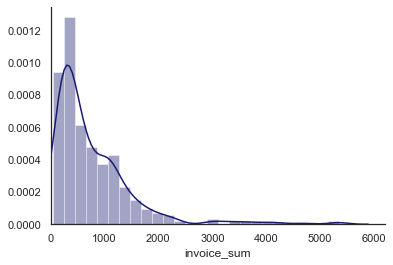

In [76]:
sns.set_style('white')
sns.distplot(client2.invoice_sum, color='midnightblue')
plt.xlim(0)
sns.despine()

Рассмотрим самых важных клиентов.

In [77]:
top_client2 = data2.groupby('client_retail_id',as_index=False).sum()
top_client2 = top_client2.sort_values(by=['invoice_sum'], ascending=False).head(10)
top_client2.iloc[:]

,client_retail_id,invoice_sum
221,1576999,5346
125,994420,5322
275,1605321,4712
145,1129652,4268
72,693373,4056
412,1731807,3917
295,1623222,3642
148,1170853,3586
40,451899,3337
51,555350,3329


У меня складывается впечатление, что второй датасет является производной от первого датасета. В первой части анализа была рассчитан столбец "объем продаж". Рассмотрим статистичесие отчеты двух датасетов.

In [78]:
top_client.iloc[:,[0,1,3]]

,client_retail_id,invoice_product_all_amount,volume
222,1576999,122,5346
126,994420,2,5322
276,1605321,16,4712
146,1129652,1,4268
73,693373,2,4056
416,1731807,6,3917
296,1623222,7,3642
149,1170853,2,3586
191,1468880,6,3022
379,1700739,2,3015


Действительно. Рассчитанные данные в первой части анализа полностью совпадают с данными из второго датасета. Это подтверждает правильность расчетов в первой части. В кратце повторим выводы первой части. Единственное различие таблиц состоит в том, что в первой таблице было 425 уникальных клиентов, а во второй 421.

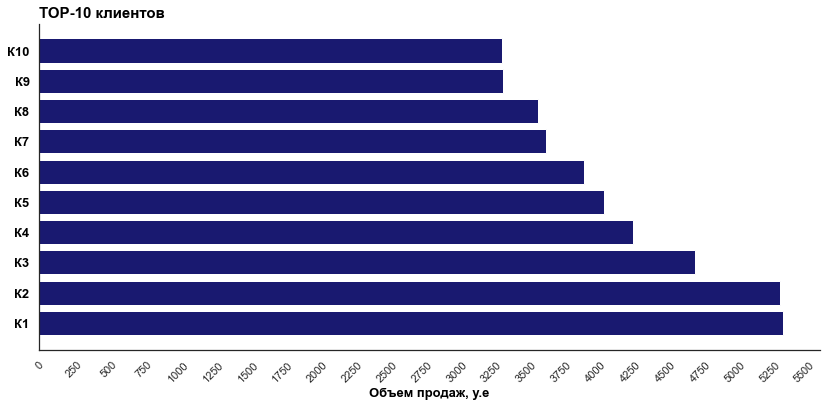

In [79]:
sns.set_style('white')
labels =  ['К1', 'К2', 'К3', 'К4', 'К5', 'К6', 'К7', 'К8', 'К9','К10']
top_client2_val = [i for i in top_client2.loc[:,'invoice_sum']]
plt.figure(figsize = (14,6))
plt.barh(labels,
         width=top_client2_val,
         color='midnightblue')
plt.title('TOP-10 клиентов',
          fontsize = 15,
          fontweight = 'bold',
          color = 'black',
          loc = 'left')
plt.xlabel('Объем продаж, у.е',
           fontsize = 13,
           fontweight = 'bold',
           color = 'black')
plt.yticks(fontsize = 13,
           fontweight = 'bold',
           color = 'black')
plt.xticks(np.arange(0, 5600, step=250), rotation=45)
sns.despine()
plt.show()

C:\Users\arl9k\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


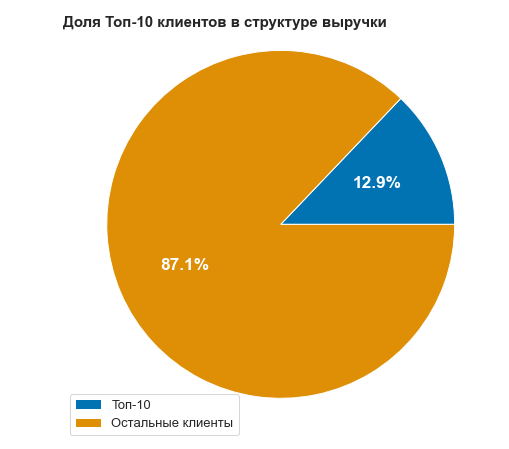

In [80]:
sns.set_style('white')
sns.set_palette('colorblind')

pie_client2_df = pd.DataFrame({
    'Top10': top_client2.invoice_sum.sum(),
    'Остальные': (data2.invoice_sum.sum()-top_client2.invoice_sum.sum())
    }, columns = ('Top10', 'Остальные'),
    index=[0])

plt.figure(figsize=(10,8))
plt.pie(pie_client2_df,
        labels = ['top10', 'Остальные'],
        autopct = '%.1f%%',
        textprops = {'size': 'x-large',
                    'fontweight': 'bold',
                    'color': 'w'})
plt.title('Доля Топ-10 клиентов в структуре выручки',
          fontsize=15,
          fontweight = 'bold',
          loc = 'left',
          pad=-20)

plt.legend(['Топ-10', 'Остальные клиенты'],
           fontsize=13,
           loc='lower left')
sns.despine()
plt.show()